In [1]:
from WikiSeriesNN import WikiSeriesNN

from WikiPlot import plot_prediction
from Seq2SeqConv import Seq2SeqConv as Seq2Seq
from os import path
import pickle

Using TensorFlow backend.


In [2]:
root_folder = "./data"
train_file = path.join(root_folder,"train_meta.pkl")

In [3]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [4]:
seq2seq = Seq2Seq(series,60)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
con

In [5]:
seq2seq.fit(epochs=2)

(40000, 742, 1)
(40000, 60, 1)
Instructions for updating:
Use tf.cast instead.
Train on 32000 samples, validate on 8000 samples
Epoch 1/2
32000/32000 [==============================] - 221s 7ms/step - loss: 0.3408 - val_loss: 0.3436
Epoch 2/2
32000/32000 [==============================] - 225s 7ms/step - loss: 0.2679 - val_loss: 0.3311


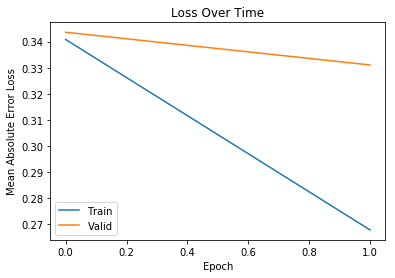

In [6]:
seq2seq.history_plot()

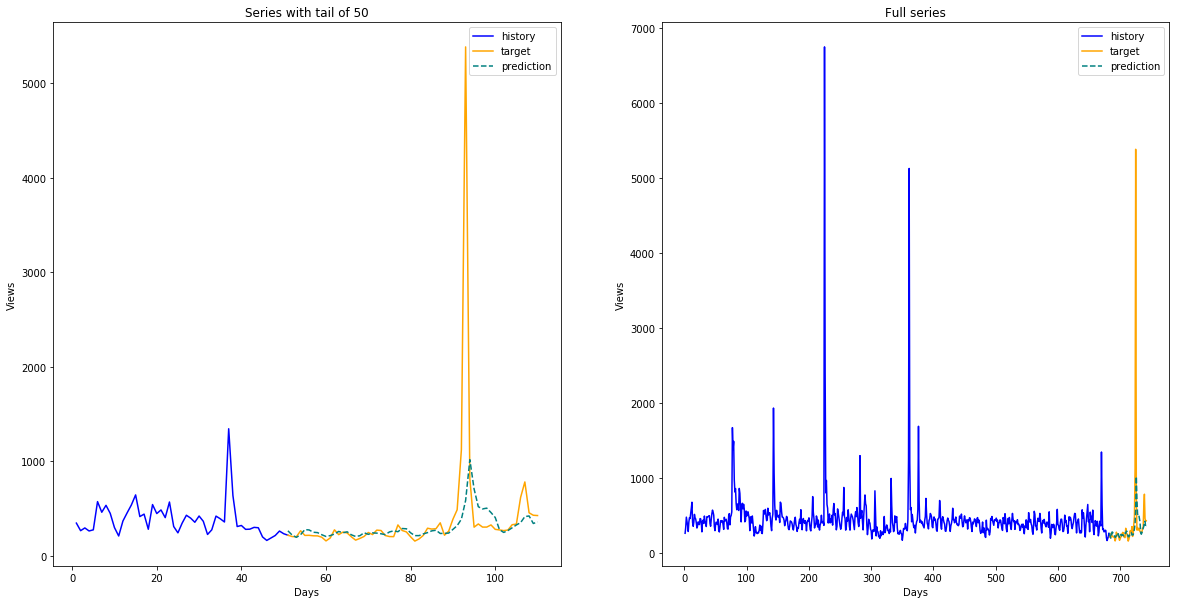

In [7]:
encode, target = series.get_validation_sample(6005)

predict = seq2seq.predict(encode,target,True)

encode,target,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,6005)

plot_prediction(encode,target,predict)

In [8]:
saved_path = path.join(root_folder,"savedConv.h5")
seq2seq.save_model(saved_path)

In [9]:
fitted = Seq2Seq(series,60)
fitted.load_model(saved_path)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          208

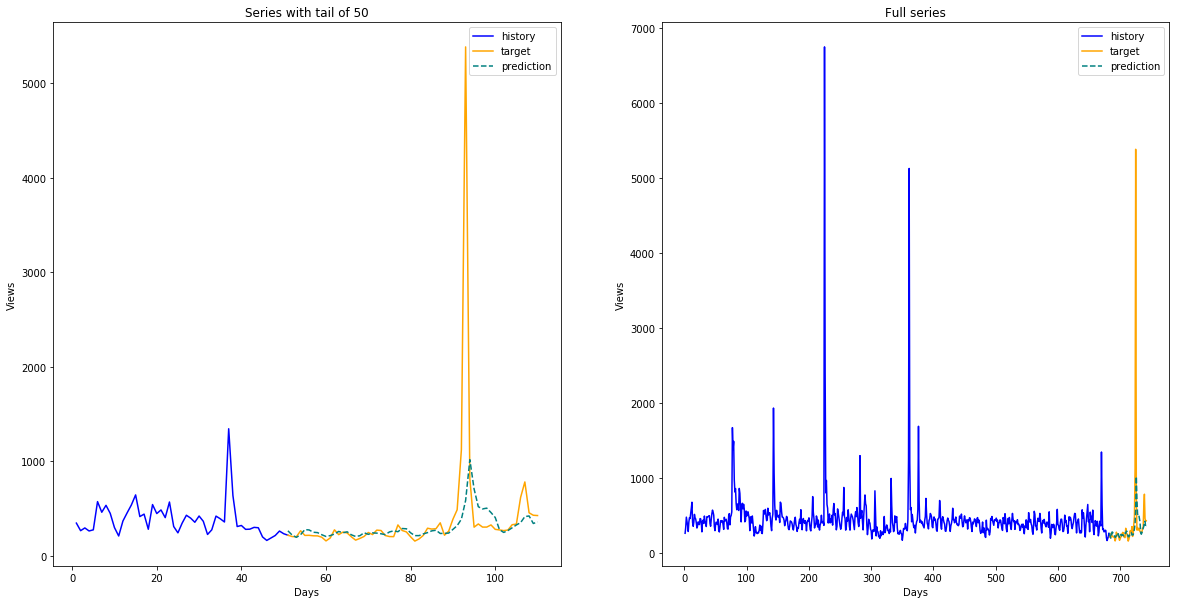

In [10]:
encode, target = series.get_validation_sample(6005)

predict = fitted.predict(encode,target,True)

encode,target,predict = fitted.normalise_reshape_prediction(encode,target,predict,6005)

plot_prediction(encode,target,predict)